# Model to predict Heart Disease

**The goal is to reate a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Here we are importing all the necessary libraries that we'll need


## Data

This database contains 14 physical attributes based on physical testing of a patient. The "target" field refers to the presence of heart disease in the patient. (0 for no presence, 1 for presence). 
In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.



Attribute Information:

* age
* sex
* chest pain type (4 values) Goes from 0 to 4
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease



  .

**Reading and Exploring our Data Set**


In [2]:
df= pd.read_csv('heartdata.csv')

# we are reading the data

In [3]:
# Now we'll check if there's any data missing in our data set
df.isnull().sum()

# Below we can see that no column has any null value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.describe()

# Here we are just checking out various statistical properties of our data set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


----
----

**Visualizing our Data**

<AxesSubplot:>

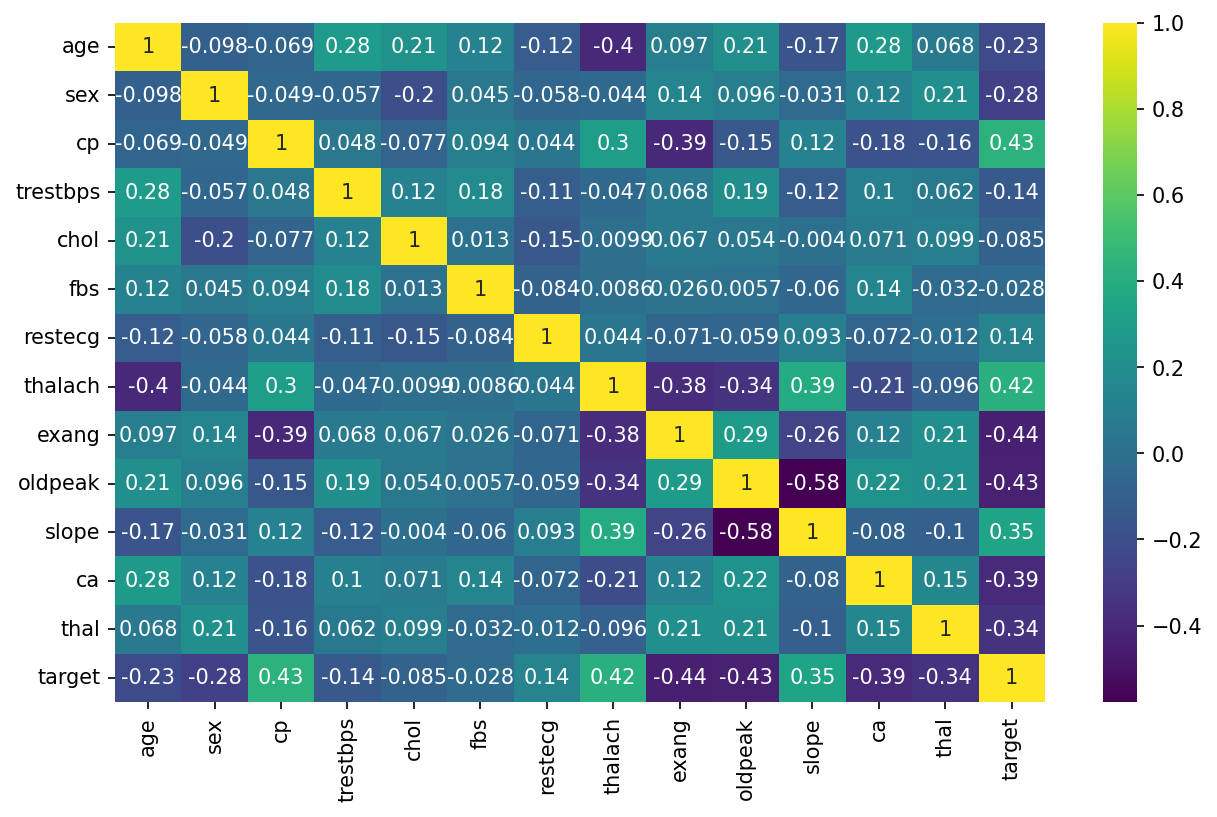

In [5]:
# Now we will see a correlation among the major physical attributes 
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(df.corr(), annot=True, cmap='viridis')



In the above figure we can see that attributes aren't much related to each other,
also it gives us an idea how the target depends on these physical attributes.
For example the corelation of age with target tells us that people having greater age will have a target = 1, which means they are at a greater risk

----
----

**Machine Learning**

In [6]:
# Now we will do train-test split on our data and we'll also scale our data

X= df.drop('target', axis=1)
y= df['target'] # dividng data set


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) #only 30% of data as test data
X_validation, X_hold, y_validation, y_hold= train_test_split( X_test, y_test, test_size=0.5, random_state=101)

# Now our data is divided in train and test data sets

In [8]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_validation = scalar.transform(X_validation) # we are not fitting our test data to avoid data leakage
scaled_X_hold = scalar.transform(X_hold)


----
----


**Creating our Model**

In [9]:
from sklearn.ensemble import RandomForestRegressor


In [10]:
ourmodel = RandomForestRegressor(n_estimators= 50, random_state=101)

In [11]:
ourmodel.fit(scaled_X_train, y_train)

# Here we have fitted our training data to our model created so that the training data set can be trained upon that model

RandomForestRegressor(n_estimators=50, random_state=101)

**Searching for best parameters**

In [12]:
param_grid={'n_estimators':[3,6,10,15,20,30,50]}


In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid=GridSearchCV(ourmodel,param_grid)


In [15]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=50, random_state=101),
             param_grid={'n_estimators': [3, 6, 10, 15, 20, 30, 50]})

In [16]:
grid.best_params_

{'n_estimators': 50}

----
----

**Evaluation of Model's performance**

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
validation_pred= ourmodel.predict(scaled_X_validation)

In [19]:
validation_pred

array([0.72, 0.9 , 0.98, 0.  , 0.6 , 0.9 , 0.86, 0.24, 0.88, 0.94, 0.28,
       0.02, 0.7 , 0.08, 0.  , 0.7 , 1.  , 0.96, 0.1 , 0.08, 0.14, 0.08,
       0.  , 0.28, 1.  , 0.02, 0.4 , 0.14, 0.18, 0.9 , 0.02, 1.  , 0.52,
       0.76, 0.12, 0.5 , 0.  , 0.52, 0.  , 0.6 , 0.1 , 1.  , 1.  , 0.56,
       0.98])

In [20]:
mean_absolute_error(y_validation, validation_pred)

0.17866666666666664

In [21]:
mean_squared_error(y_validation, validation_pred)

0.07447111111111111

In [22]:
df.describe()['target']

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

**Final testing of model on unseen data**

In [23]:
hold_pred= ourmodel.predict(scaled_X_hold)

In [24]:
mean_absolute_error(y_hold, hold_pred)

0.3247826086956522

In [25]:
mean_squared_error(y_hold, hold_pred)

0.17430434782608692

----
----

**Finally testing our model on fresh data**

These are the details of a patients
  
    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [26]:
# For our convenience let us convert this data in an array
patient = [[ 48 ,   0 ,   2 , 130 , 275 ,   0 ,   1 , 139 ,   0 ,  0.2,   2 ,   0 ,   2 ]]

In [27]:
ourmodel.predict(patient)

# Here we can see we are getting an output of '0' which tells that the patients is not likely to have a heart disease

array([0.38])

In [28]:
ourmodel.predict(patient)

# Here we see the probability of a patient not having a heart disease vs having a heart disease

array([0.38])

**Here the probability of this patient not having a heart disease is 0.99**
**and probability of having a heart disease is 0.1**

In [29]:
import joblib

In [30]:
joblib.dump(ourmodel, 'ourmodel.pkl')

['ourmodel.pkl']

In [31]:
list(X.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [32]:
joblib.dump(list(X.columns), 'col_names.pkl')

['col_names.pkl']

**Loading Model**

In [33]:
new_column= joblib.load('col_names.pkl')


In [34]:
loaded_model= joblib.load('ourmodel.pkl')


In [35]:
loaded_model.predict ([[48 ,   0 ,   2 , 130 , 275 ,   0 ,   1 , 139 ,   0 ,  0.2,   2 ,   0 ,   2 ]])

array([0.38])